<a href="https://colab.research.google.com/github/sasdil/Machine-Learning/blob/main/MNIST_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [3]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

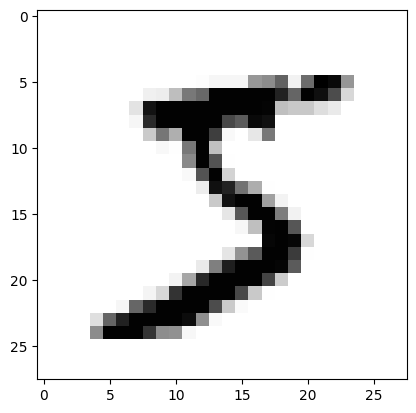

In [6]:
plt.imshow(x_train[0],cmap = "Greys")

In [15]:
model = tf.keras.models.Sequential([
    layers.Flatten(input_shape = (28,28)),
    layers.Dense(128,activation = "relu"),
    layers.Dense(64,activation = "relu"),
    layers.Dense(24,activation = "relu"),
    layers.Dense(10,activation = "softmax")
])
model.compile(optimizer = "adam",loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 24)                1560      
                                                                 
 dense_15 (Dense)            (None, 10)                250       
                                                                 
Total params: 110546 (431.82 KB)
Trainable params: 110546 (431.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
y_one_hot = tf.one_hot(y_train,10)
model.fit(x_train,y_train,batch_size = 128,epochs = 10,validation_data = (x_test,y_test),verbose = False)

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


In [17]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0806 - accuracy: 0.9801


[0.08064044266939163, 0.9800999760627747]

1/1 [==============================] - 0s 21ms/step
predict_num =  7


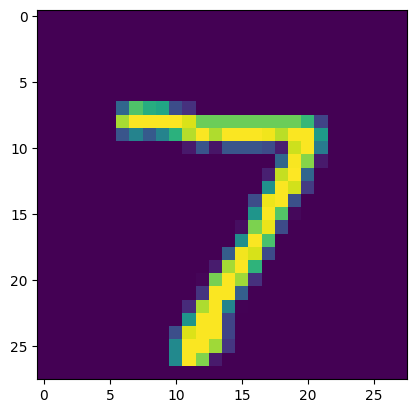

predict_num =  2


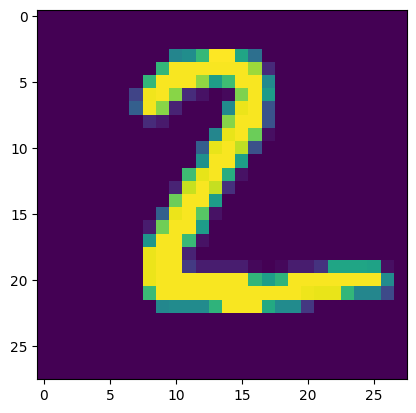

predict_num =  1


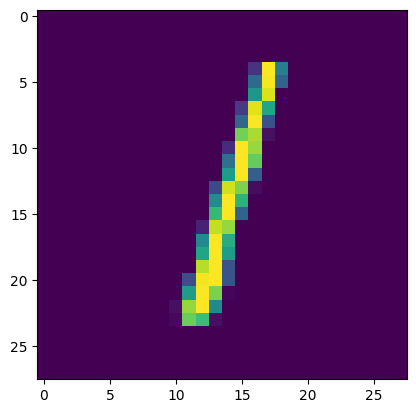

predict_num =  0


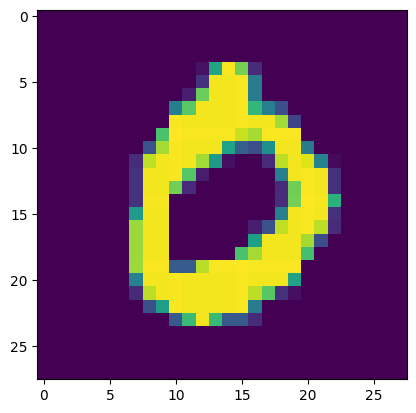

predict_num =  4


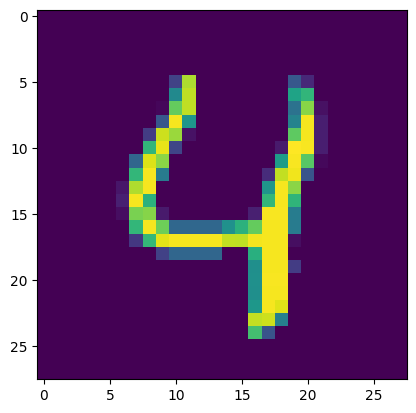

In [21]:
probs = model.predict(x_test[:5])
prads = np.argmax(probs,axis = 1)
for i in range(5):
  print("predict_num = ",prads[i])
  plt.imshow(x_test[i])
  plt.show()